# **Support Vector Classifier (SVC)**
A Support Vector Classifier (SVC) is a powerful supervised machine learning model that finds the optimal boundary (hyperplane) to separate different classes in data, aiming to maximize the margin, or distance, to the nearest data points (called support vectors) of each class, leading to better generalization and less overfitting, especially with non-linear data using the kernel trick.

![svc](https://media.geeksforgeeks.org/wp-content/uploads/20250807122724737293/support_vectors_hyperplane.webp)

## Components of SVC
- **Hyperplane**: The *Maximum margin hyperplane (as in the image)* is a line (in 2D) tha separates two classes, it is in the middle of marginal planes.
- **Marginal planes**: The lines (in 2D) that touch the support vector closest to the *Hyperplane*.
- **Support vectors**: The data points that closest to the *Hyperplane*.

The goal is to maximise the distance between both the marginal planes

## Soft Margin v/s Hard margin
- **Hard Margin**\
A Hard Margin SVC requires every single data point to be correctly classified and positioned outside the margin. This approach only works when the data is perfectly linearly separable, meaning a clear line or plane can divide the classes without any overlap. Because it refuses to tolerate errors, it is extremely sensitive to outliers; a single data point placed slightly closer to the opposing class can drastically shift the boundary or make a solution mathematically impossible. Consequently, Hard Margin models often suffer from overfitting, capturing noise rather than the true underlying pattern of the data.

- **Soft Margin**\
A Soft Margin SVC is the standard approach for real-world data, which is often messy, noisy, or overlapping. It introduces a "slack variable" that allows some data points to violate the margin or even be misclassified if it results in a wider, more stable boundary. This balance is controlled by the C parameter: a smaller C creates a "softer" margin that prioritizes a broad separation over perfect accuracy on the training set, while a larger C tightens the margin to reduce training errors. By being more flexible, Soft Margin classifiers generally generalize much better to new, unseen data.

![](https://miro.medium.com/1*CD08yESKvYgyM7pJhCnQeQ.png)

## How we find the Hyperplane
*Assuming 2D plane for now**

The goal is to find a line that represents the mid-point of two marginal planes, we will need the **Hyperplane**:

$$ ax + by + c = 0 $$
$$ =>\ changing\ the\ variables\ only $$
$$ w₁x₁ + w₂x₂ + b = 0 $$
$$ ... $$
$$ representing\ (w₁x₁ + w₂x₂)\ as\ dot\ product\ of\ two\ vectors $$
$$ w.x = [w₁, w₂].[x₁, x₂] =>\ dot\ product $$
$$ Dot\ product\ can\ be\ written\ as\ matrix\ multiplication\ when\ vectors\ are\ arranged\ properly.... $$
$$ w.x = w'x, (w' = transpose\ of\ w\ vector) $$
$$ ... $$
$$ So,\ the\ final\ equation\ of\ the\ Hyperplane\ is: $$
$$ w'x + b = 0 $$

The marginal planes are can be defined by these equations:
$$ w'x + b = 1 => for\ positive\ margin $$
$$ w'x + b = -1 => for\ negative\ margin $$

## Cost function

The aim of ours is to maximise the distance between the marginal planes, so first we define **the distance as a vector**

$$ Subtracting\ them $$
$$ (w'x₁ + b - 1) - (w'x₂ + b + 1) = w'(x₁ - x₂) - 2 $$
$$ w'(x₁ - x₂) = 2 $$
$$ as\ we\ don't\ really\ have\ to\ care\ about\ the\ magnitude,\ make\ it\ a\ unit\ vector\ by\ dividing\ it\ by\ it's\ magnitude. $$
$$ w'(x₁ - x₂)/|w| = 2/|w| $$
$$ our\ aim\ is\ to\ maximise\ this\ => 2/|w| $$
$$ or,\ we\ can\ say,\ to\ minimise\ this\ => |w|/2 $$

Now, we need a constraint to check the check the distance is optimal or not
$$ yᵢ * (w'x + b) >= 1 $$
If the above constraint is followed by every point then we can say the model is performing well, so we can can maximise our mragins (or minimise |w|/2) till this constraint is being satisfied.

**But!**, this doesn't work like this in real world! the above constraint can be satidfied totally only when it is a **hard margin**, which is higly rare in real world.
So, we need a function called **Hinge-loss** that will check for the misclassified points and penalise them according to their degree of error.

## Hinge loss

Just add some values to the loss function and then it is good to go.

$$ |w|/2 + C \sum^{n}_{i=1} ζᵢ $$
$$ where, $$
$$ C = a\ hypermeter\ that\ defines\ the\ strictness\ model. $$
$$ \sum^{n}_{i=1} ζᵢ = summation\ of\ all\ the\ distances\ of\ the\ misclassified\ points\ from\ the\ margin\ $$

Now, the task is the reduce this $ |w|/2 + C \sum^{n}_{i=1} ζᵢ $. And this will also make sure than penalising is done for every error and the magnitude of error

## SCV Implementation

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [365]:
# get the dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

In [366]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='0', ylabel='1'>

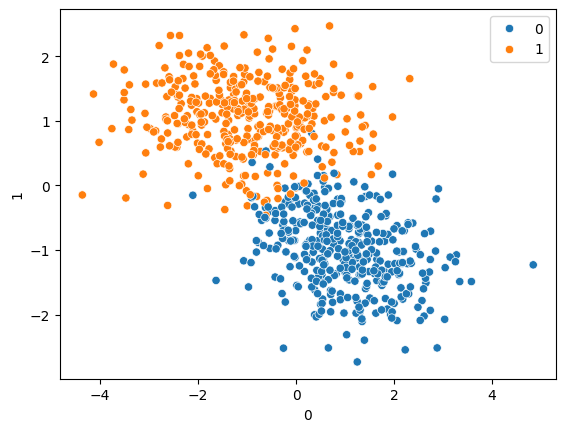

In [367]:
# visualise the train data
sns.scatterplot(x=pd.DataFrame(X_train)[0], y=pd.DataFrame(X_train)[1], hue=y_train)

In [368]:
# the data is clearly separable with a very litle overlapping
from sklearn.svm import SVC
svc = SVC(kernel='linear')  # using linear kernel

In [369]:
# training the model
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [370]:
# check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = svc.predict(X_test)
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

0.936
[[123   2]
 [ 14 111]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.98      0.89      0.93       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



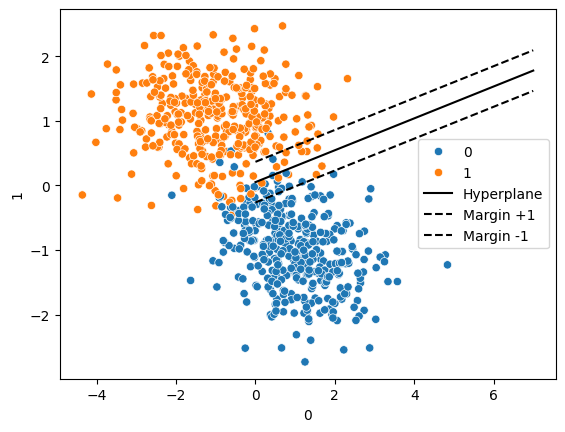

In [372]:
# seeing the hyperplane and marginal planes
sns.scatterplot(x=pd.DataFrame(X_train)[0], y=pd.DataFrame(X_train)[1], hue=y_train)

w = svc.coef_[0]
b = svc.intercept_[0]

xx = np.linspace(0, 7, 40)
yy = -(w[0]*xx + b) / w[1]
yy_margin1 = -(w[0]*xx + b - 1) / w[1]
yy_margin2 = -(w[0]*xx + b + 1) / w[1]

plt.plot(xx, yy, 'k-', label="Hyperplane")
plt.plot(xx, yy_margin1, 'k--', label="Margin +1")
plt.plot(xx, yy_margin2, 'k--', label="Margin -1")
plt.legend()
plt.show()